# Vizualização e tratamento da base de dados

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("churn_prediction.csv")
dataset.shape

(28382, 21)

In [3]:
dataset.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [4]:
# Verificando a existência de dados nulos
dataset.info()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [5]:
# Verificando a existência de instâncias duplicadas pelo customer_id
dataset[dataset.duplicated(['customer_id'], keep=False)]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction


In [6]:
# Eliminando a coluna customer_id
# Tal coluna não terá utilidade para o modelo
dataset = dataset.drop(columns = 'customer_id')
dataset.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


gender
Female    11309
Male      16548
dtype: int64

<Axes: xlabel='gender'>

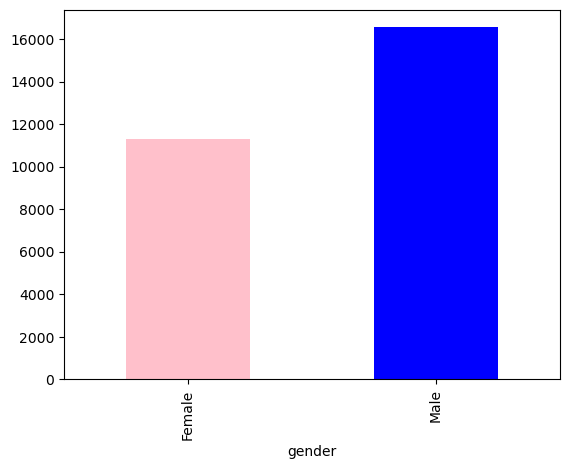

In [7]:
import seaborn as sb
# Verificando a moda da coluna gênero
agrupamento = dataset.groupby(["gender"]).size()
display(agrupamento)
agrupamento.plot.bar(color = ['pink', 'blue'])

In [8]:
# Substituindo dados nulos de gênero pela moda (masculino)
dataset['gender'].fillna('Male', inplace = True)
# Em seguida, observamos que não existem mais dados nulos na coluna gênero
dataset["gender"].isnull().sum()

0

occupation
company             40
retired           2024
salaried          6704
self_employed    17476
student           2058
dtype: int64

<Axes: xlabel='occupation'>

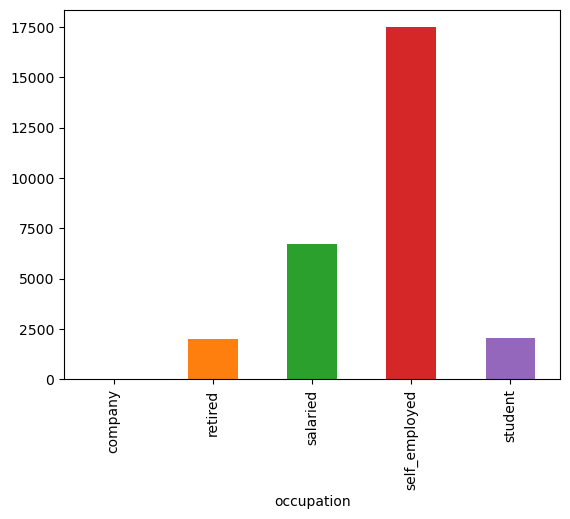

In [9]:
# Verificando a moda da coluna ocupação
agrupamento = dataset.groupby(["occupation"]).size()
display(agrupamento)
current_palette = sb.color_palette() 
agrupamento.plot.bar(color = current_palette)

In [10]:
# Substituindo dados nulos pela moda (autônomo)
dataset['occupation'].fillna('self_employed', inplace = True)
# Em seguida, observamos que não existem mais dados nulos na coluna occupation
dataset["occupation"].isnull().sum()

0

dependents
0.0     21435
1.0      1395
2.0      2150
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
8.0         1
9.0         1
25.0        1
32.0        1
36.0        1
50.0        1
52.0        1
dtype: int64

<Axes: xlabel='dependents'>

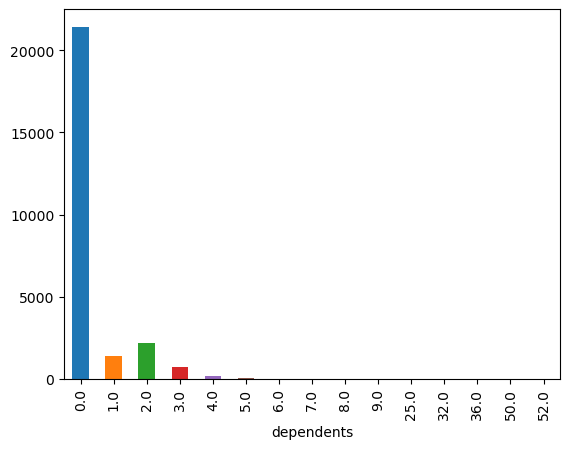

In [11]:
# Verificando a moda da coluna dependentes
agrupamento = dataset.groupby(["dependents"]).size()
display(agrupamento)
current_palette = sb.color_palette() 
agrupamento.plot.bar(color = current_palette)

In [12]:
# Substituindo dados nulos pela moda (0)
dataset["dependents"].fillna(0, inplace = True)
# Em seguida, observamos que não existem mais dados nulos na coluna dependents
dataset["dependents"].isnull().sum()

0

In [13]:
# Verificando a substituição
agrupamento = dataset.groupby(["dependents"]).size()
display(agrupamento)

dependents
0.0     23898
1.0      1395
2.0      2150
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
8.0         1
9.0         1
25.0        1
32.0        1
36.0        1
50.0        1
52.0        1
dtype: int64

Text(0.5, 1.0, 'city')

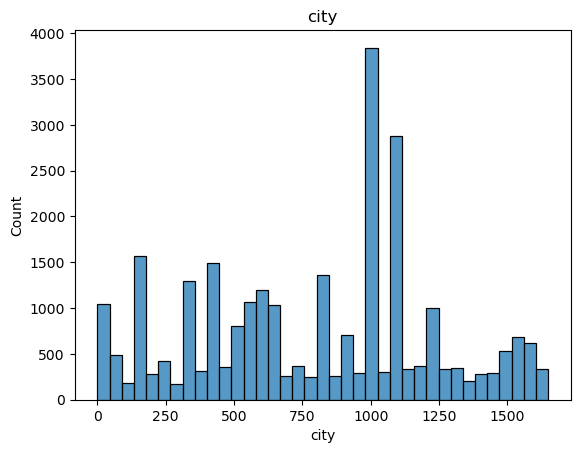

In [14]:
# Explorando a coluna city
sb.histplot(dataset['city']).set_title('city')

In [15]:
# Calculando a mediana da coluna city
import statistics as st
mediana = st.median(dataset['city'])
print (mediana)

892.5


In [16]:
# Substituindo dados nulos pela mediana (892.5)
dataset["city"].fillna(mediana, inplace = True)
# Em seguida, observamos que não existem mais dados nulos na coluna city
dataset["city"].isnull().sum()

0

In [17]:
# Verificando se ainda existem dados nulos
dataset.isnull().sum()

vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
dtype: int64

# Análise exploratória - Dados numéricos

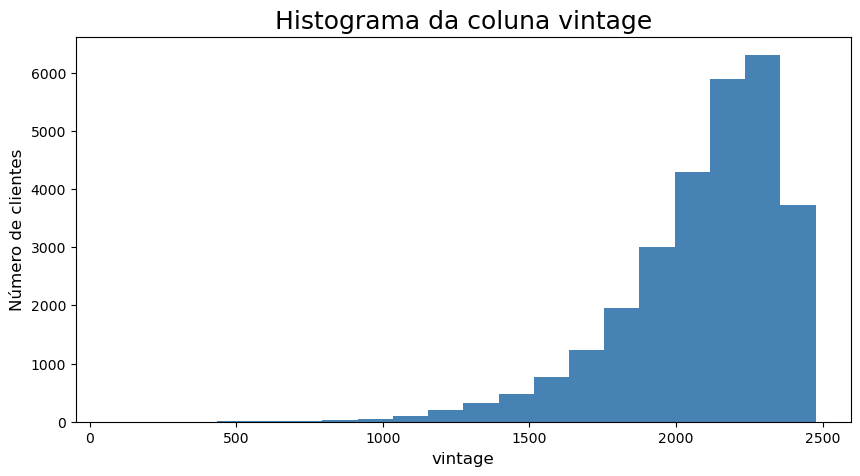

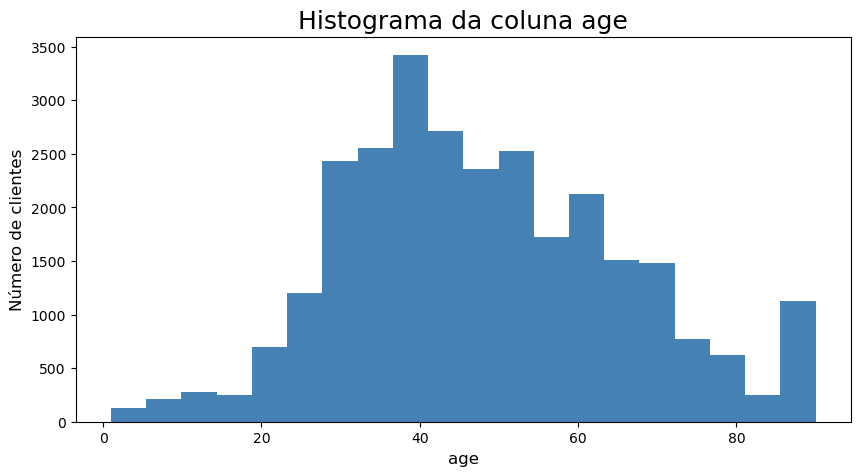

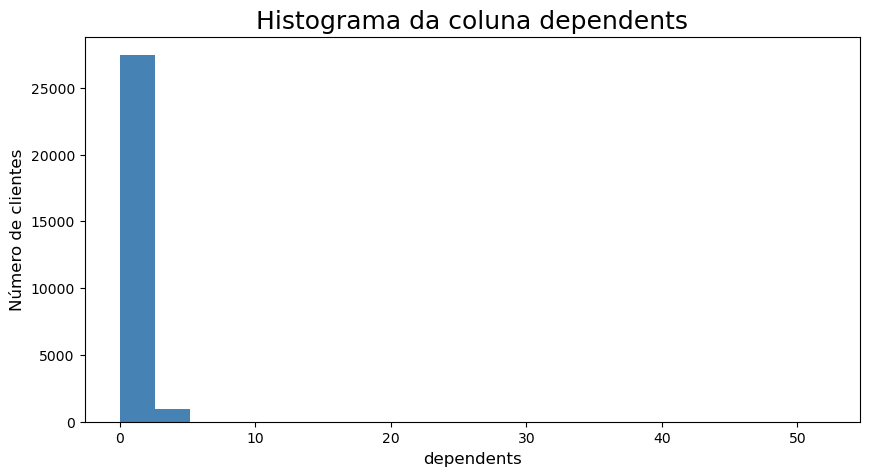

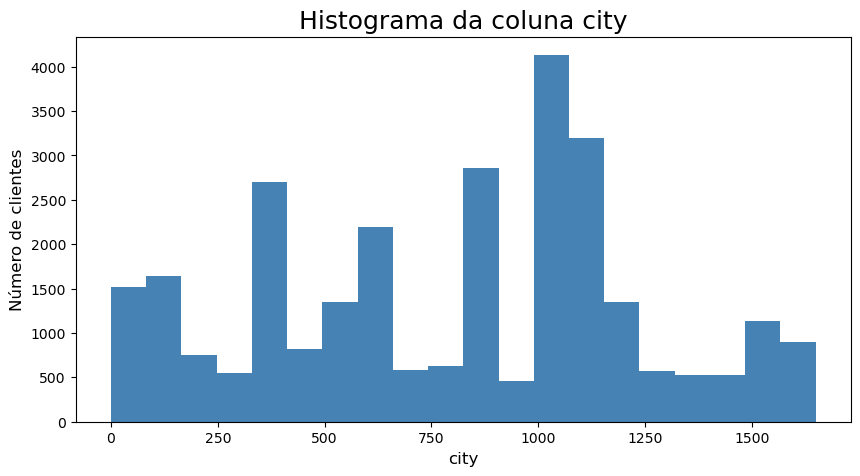

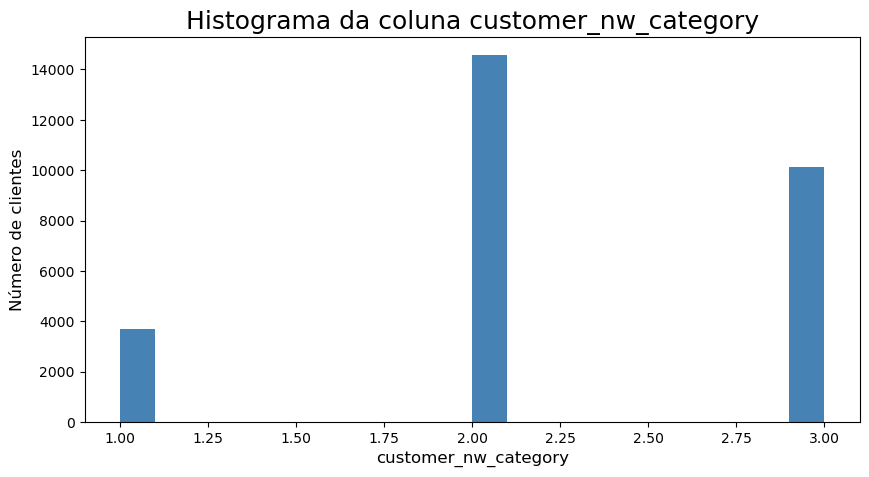

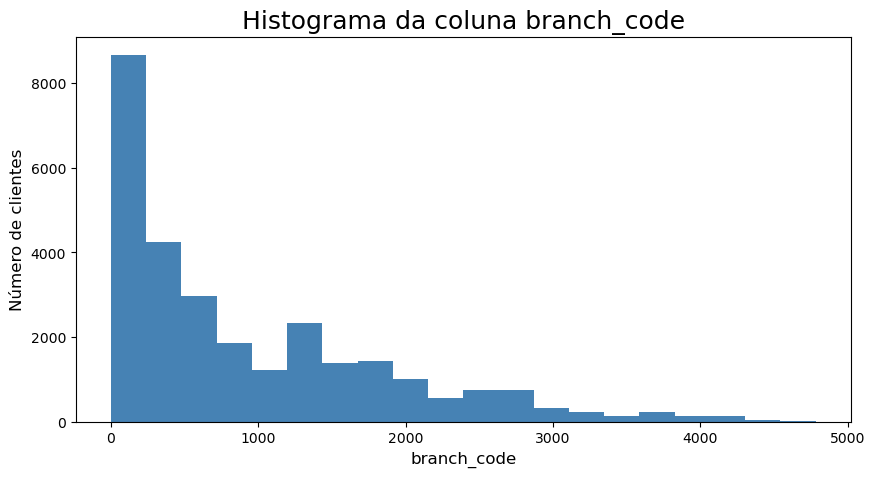

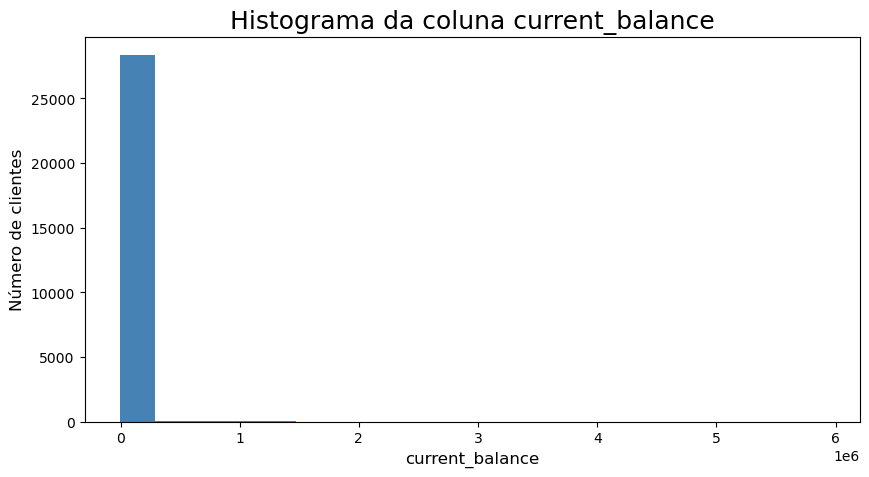

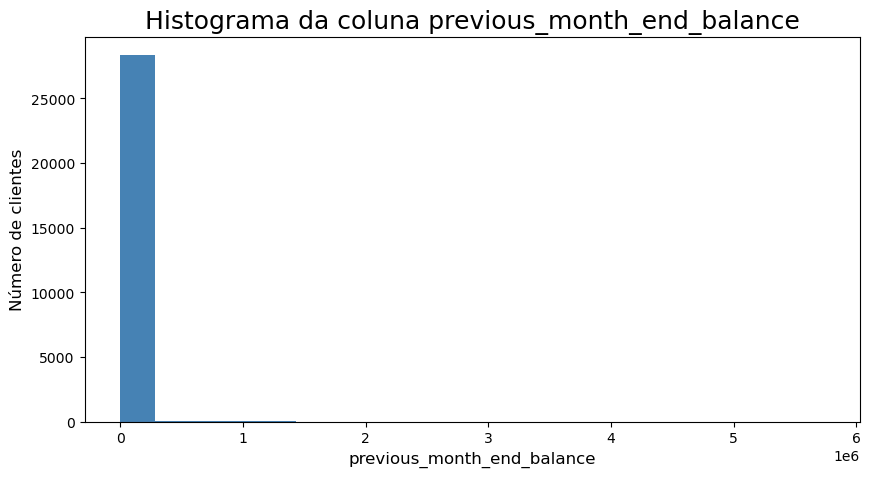

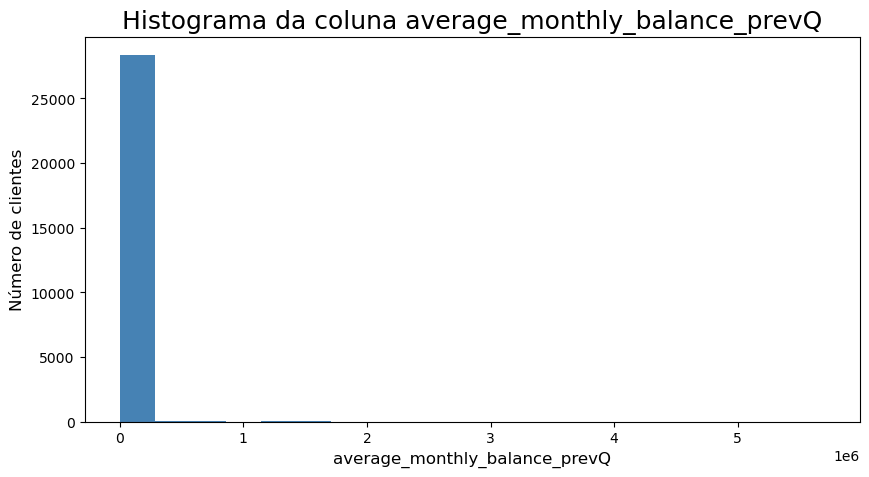

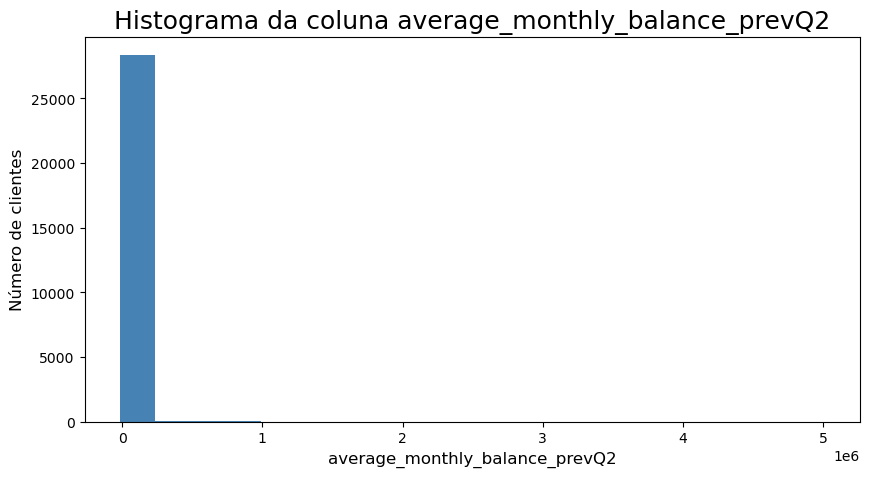

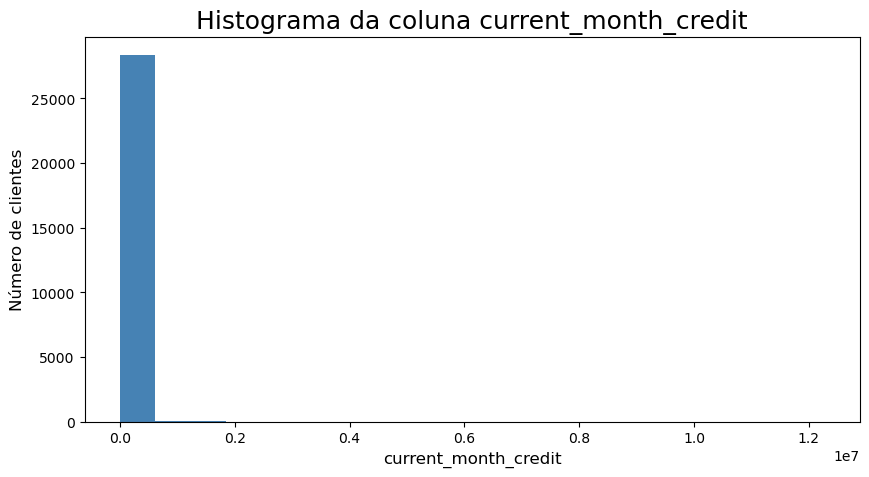

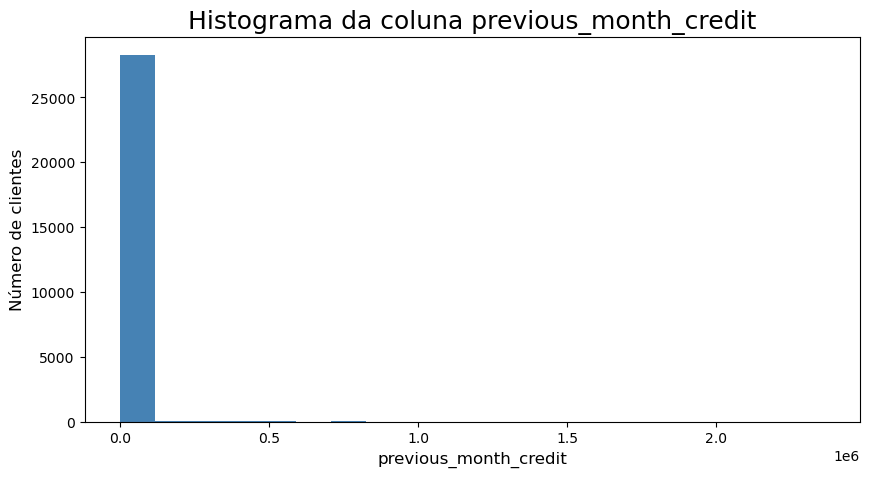

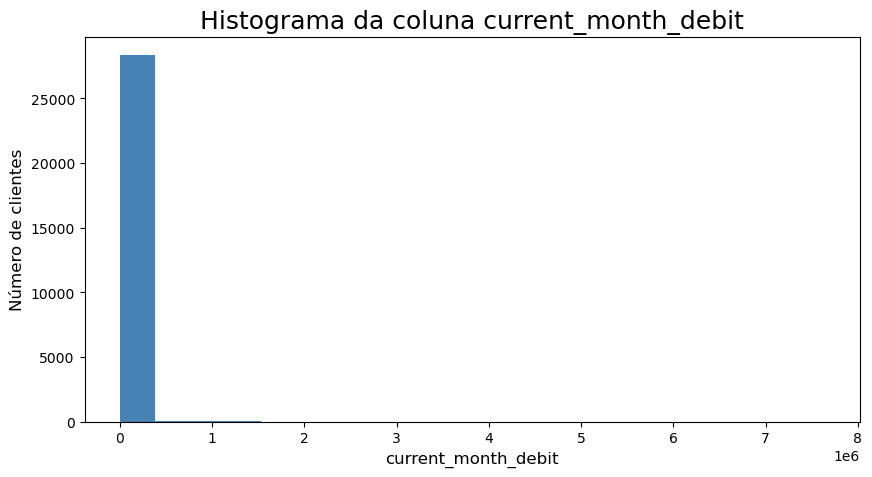

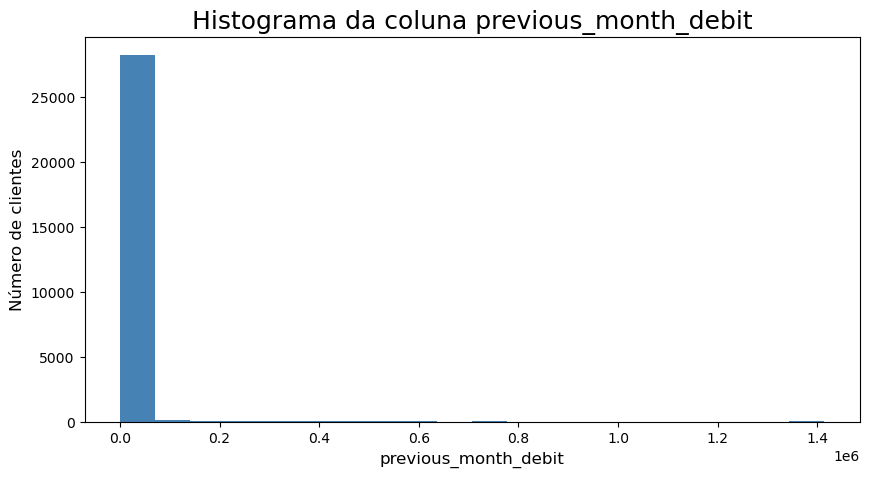

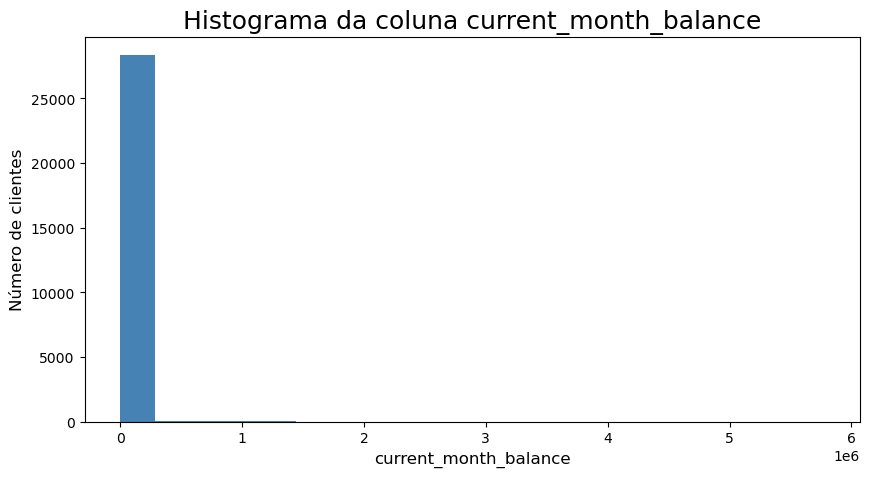

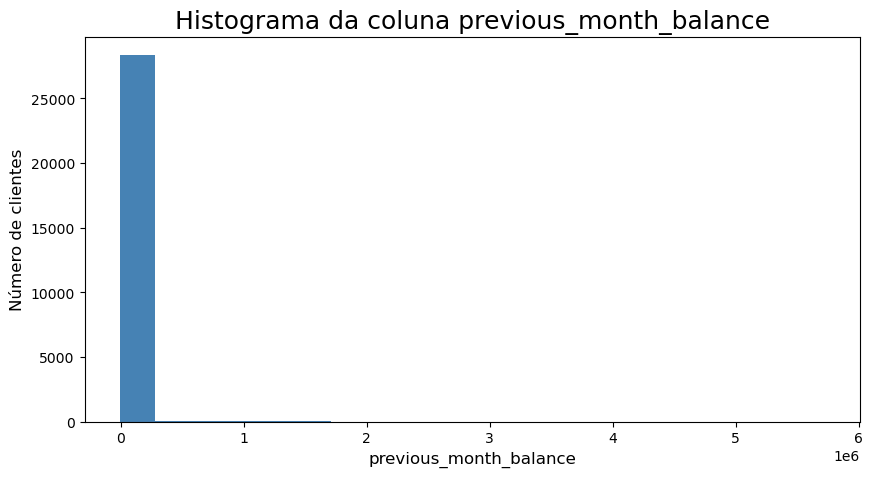

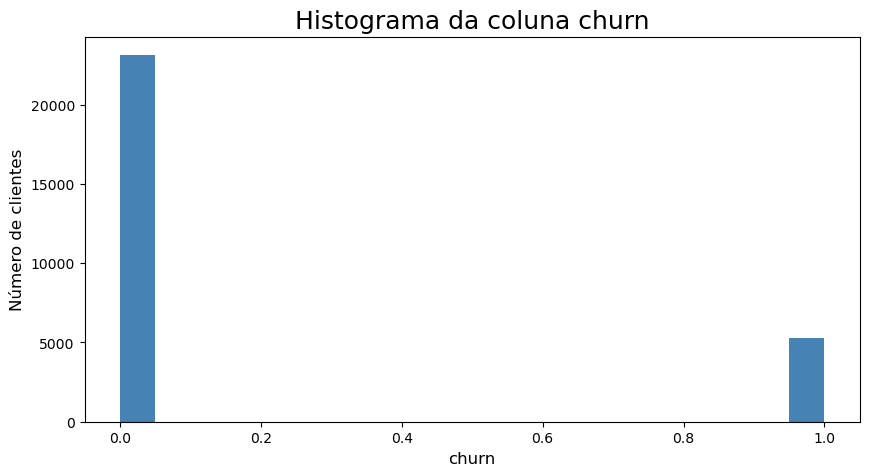

In [18]:
import matplotlib.pyplot as plt
colunas_numericas = dataset.select_dtypes(include=['int64', 'float64']).columns
for column in colunas_numericas:
    plt.figure(figsize=(10, 5))
    plt.hist(dataset[column], bins=20, color='steelblue')
    plt.title(f'Histograma da coluna {column}', fontsize=18)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Número de clientes', fontsize=12)
    plt.show()

# Análise exploratória - Dados categóricos

Male      60.2%
Female    39.8%
Name: gender, dtype: object

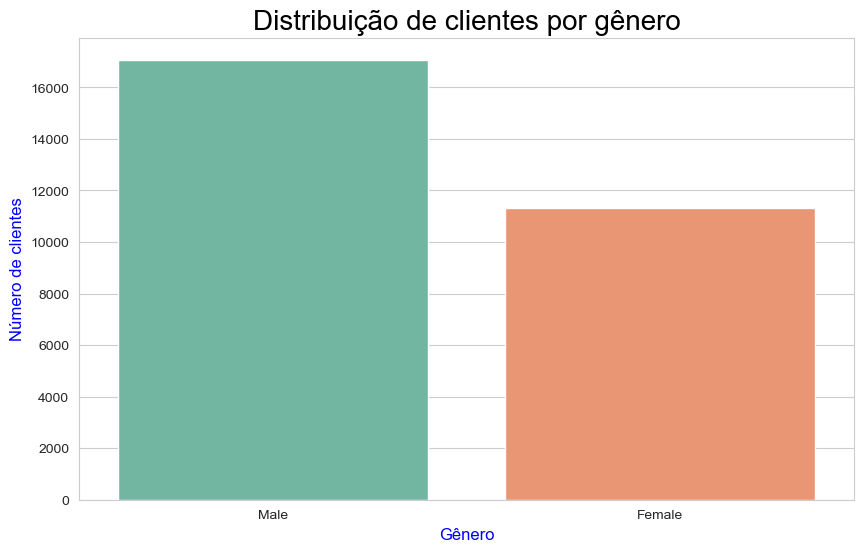

In [19]:
display(dataset["gender"].value_counts(normalize = True).map("{:.1%}".format))
sb.set_palette("Set2")
plt.figure(figsize=(10, 6))
sb.set_style("whitegrid")
sb.countplot(data=dataset, x='gender')
plt.title("Distribuição de clientes por gênero", fontsize=20, color='black')
plt.xlabel("Gênero", fontsize=12, color='blue')
plt.ylabel("Número de clientes", fontsize=12, color='blue')
plt.show()

self_employed    61.9%
salaried         23.6%
student           7.3%
retired           7.1%
company           0.1%
Name: occupation, dtype: object

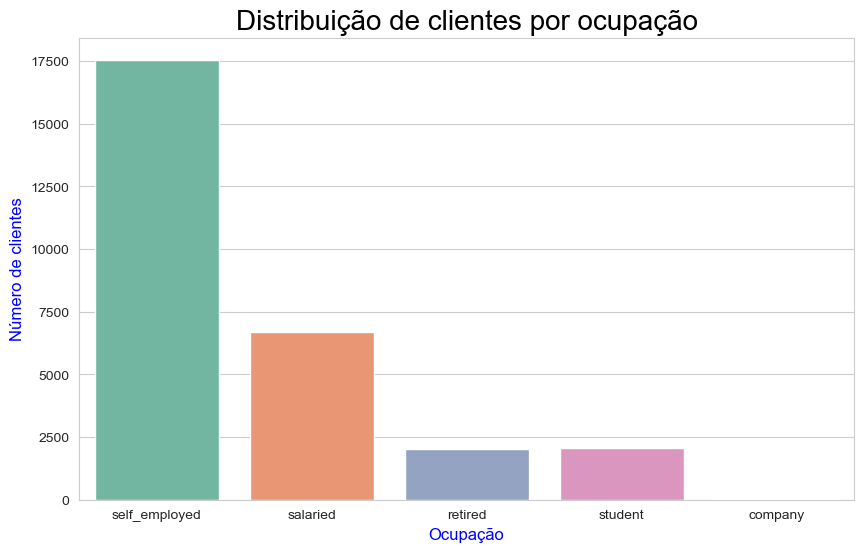

In [20]:
display(dataset["occupation"].value_counts(normalize = True).map("{:.1%}".format))
sb.set_palette("Set2")
plt.figure(figsize=(10, 6))
sb.set_style("whitegrid")
sb.countplot(data=dataset, x='occupation')
plt.title("Distribuição de clientes por ocupação", fontsize=20, color='black')
plt.xlabel("Ocupação", fontsize=12, color='blue')
plt.ylabel("Número de clientes", fontsize=12, color='blue')
plt.show()

0    81.5%
1    18.5%
Name: churn, dtype: object

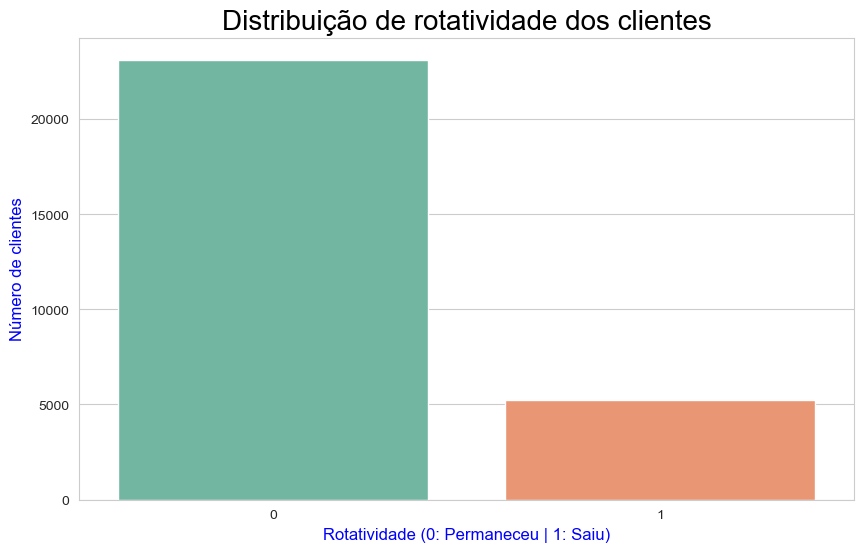

In [21]:
display(dataset["churn"].value_counts(normalize = True).map("{:.1%}".format))
sb.set_palette("Set2")
plt.figure(figsize=(10, 6))
sb.set_style("whitegrid")
sb.countplot(data=dataset, x='churn')
plt.title("Distribuição de rotatividade dos clientes", fontsize=20, color='black')
plt.xlabel("Rotatividade (0: Permaneceu | 1: Saiu)", fontsize=12, color='blue')
plt.ylabel("Número de clientes", fontsize=12, color='blue')
plt.show()

# Processo de Label Encoder

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [24]:
label_encoder = LabelEncoder()
colunas_categoricas = ['gender', 'occupation', 'last_transaction']
for column in colunas_categoricas:
    dataset[column] = label_encoder.fit_transform(dataset[column])
dataset.dtypes

vintage                             int64
age                                 int64
gender                              int32
dependents                        float64
occupation                          int32
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                    int32
dtype: object

# Separação das variáveis em x (previsores) e y (classe)

In [25]:
x = dataset.drop(['churn'], axis=1)
y = dataset['churn']

# Divisão da base de dados entre treinamento (70%) e teste (30%)

In [26]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,
                                                        y,
                                                        test_size = 0.3,
                                                        random_state = 42)

# Criação dos modelos

In [27]:
modelos = [
    ("Naive Bayes", GaussianNB()),
    ("Random Forest", RandomForestClassifier()),
    ("Árvore de Decisão", DecisionTreeClassifier()),
    ("Regressão Logística", LogisticRegression(max_iter=1500))
]

# Treinamento dos modelos, geração das previsões e cálculo da taxa de precisão

In [28]:
for name, model in modelos:
    model.fit(x_treino, y_treino)
    previsoes = model.predict(x_teste)
    taxa_de_acerto = accuracy_score(y_teste, previsoes)
    taxa_de_erro = 1 - taxa_de_acerto
    
    print(f"Modelo: {name}")
    print(f"Taxa de acerto: {taxa_de_acerto:.2%} | Taxa de erro: {taxa_de_erro:.2%}")
    print("\n")

Modelo: Naive Bayes
Taxa de acerto: 81.51% | Taxa de erro: 18.49%


Modelo: Random Forest
Taxa de acerto: 86.58% | Taxa de erro: 13.42%


Modelo: Árvore de Decisão
Taxa de acerto: 79.86% | Taxa de erro: 20.14%


Modelo: Regressão Logística
Taxa de acerto: 83.09% | Taxa de erro: 16.91%




# Matriz de confusão do modelo Naive Bayes

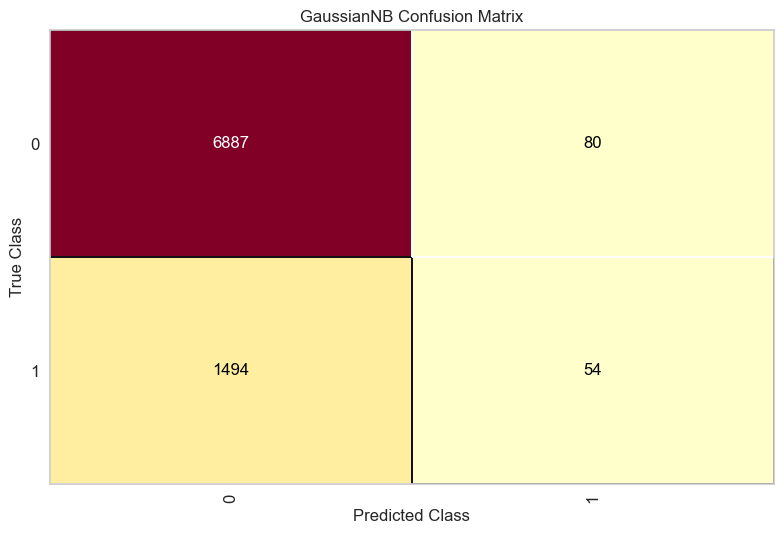

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [29]:
confusao_NB = ConfusionMatrix(GaussianNB())
confusao_NB.fit(x_treino, y_treino)
confusao_NB.score(x_teste, y_teste)
confusao_NB.poof()

# Matriz de confusão do modelo Random Forest

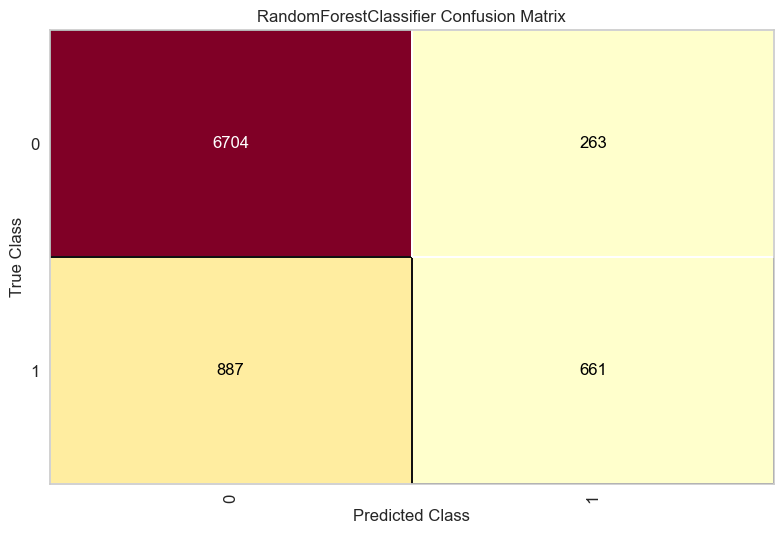

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [30]:
confusao_RF = ConfusionMatrix(RandomForestClassifier())
confusao_RF.fit(x_treino, y_treino)
confusao_RF.score(x_teste, y_teste)
confusao_RF.poof()

# Matriz de confusão do modelo Árvore de Decisão

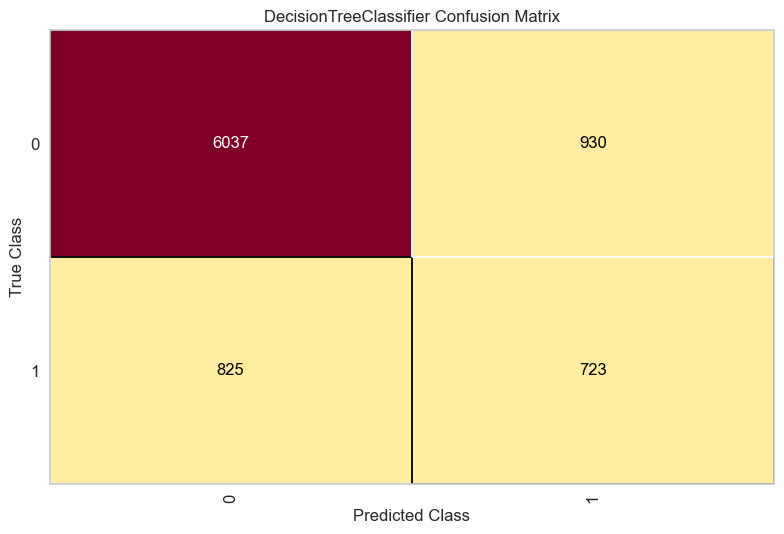

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [31]:
confusao_AD = ConfusionMatrix(DecisionTreeClassifier())
confusao_AD.fit(x_treino, y_treino)
confusao_AD.score(x_teste, y_teste)
confusao_AD.poof()

# Matriz de confusão do modelo Regressão Logística

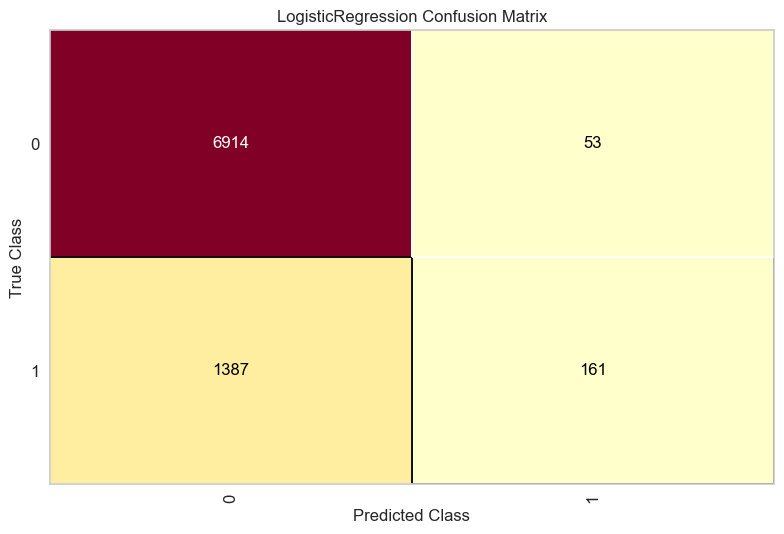

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [32]:
confusao_RL = ConfusionMatrix(LogisticRegression(max_iter=1500))
confusao_RL.fit(x_treino, y_treino)
confusao_RL.score(x_teste, y_teste)
confusao_RL.poof()